In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Apply a fix to a statsmodel library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [16]:
raw_data=pd.read_csv(r'C:\Users\Lenovo-Pc\Downloads\2.01.+Admittance.csv')

In [17]:
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [18]:
data=raw_data.copy()
data['Admitted']=data['Admitted'].map({'Yes':1,'No': 0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [19]:
y=data['Admitted']
x1=data['SAT']

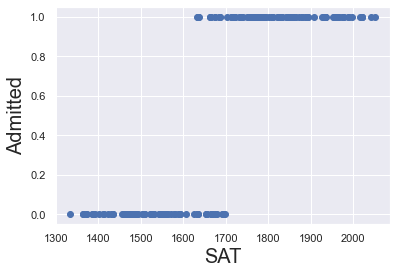

In [20]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize='20')
plt.show()

C:\Users\Lenovo-Pc\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


AttributeError: 'Text' object has no property 'font_size'

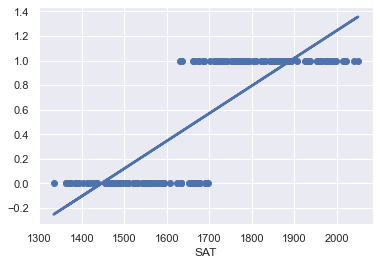

In [21]:
x=sm.add_constant(x1)
reg_lin=sm.OLS(y,x)
results_lin=reg_lin.fit()
plt.scatter(x1,y,color='C0')
y_hat=x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C0')
plt.xlabel('SAT',font_size=20)
plt.ylabel('Admitted',font_size=20)
plt.show()

In [ ]:
reg_log=sm.Logit(y,x)
results_log=reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

f_sorted=np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted=np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.plot(x_sorted,f_sorted,color='C0')
plt.show()

In [22]:
results_log.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Feb 2022   Pseudo R-squ.:                  0.7992
Time:                        11:18:59   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""